In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df=pd.read_csv('reviews_supplements.csv', encoding= 'unicode_escape')

In [5]:
df.shape

(16671, 11)

In [13]:
df.head(10)

,rating,title,text,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,date,time
0,4,B Complex in gel cap form,I bought this along with Vit C in gel cap form...,B00012ND5G,B00012ND5G,AGDVFFLJWAQ3ULNNKF4LXID2RVSQ,2009-12-11 00:37:33,1,True,2009-12-11,00:37
1,5,Five Stars,great product,B00013Z0ZQ,B00013Z0ZQ,AG3BSKXHDGP6E3EGQD2SXCK6KFQQ,2015-01-04 03:11:26,0,True,2015-01-04,03:11
2,5,Five Stars,Came as expectedly,B00013Z0ZQ,B00013Z0ZQ,AHG2WKFD4LXPC46WWC6JMQGX52JA,2015-09-27 19:15:33,0,True,2015-09-27,19:15
3,5,Vitamin Shoppe Dry Vitamin A,Excellent Product ..... Fast Delivery ....... ...,B00013Z1KA,B00013Z1KA,AEOF7RT3AC4ACRX5HGIP2V3BNIHA,2019-02-09 19:33:16.911,0,True,2019-02-09,19:33
4,5,Un producto que compro regularmente,Es muy buena vitamina,B00013Z1KA,B00013Z1KA,AGW2WETWQRL2PKUGTL2LU7IJ2BPQ,2022-07-25 14:11:10.936,0,True,2022-07-25,14:11
5,5,Natural Sources,I have been taking this product for years. I ...,B00014D0IY,B00014D0IY,AHAHKQ4GXWPCBMPUBHOOGKBQWKAA,2015-12-18 14:05:08,0,True,2015-12-18,14:05
6,5,Liver Support supplement,I have had good results with this support vita...,B00014DY62,B00014DY62,AHZSW5KOLYC4RD2N5BMNT2RTZNMQ,2014-03-23 17:52:36,0,True,2014-03-23,17:52
7,4,"I feel this is working, had chemotherapy and a...","I feel this is working, had chemotherapy and a...",B00014DY62,B00014DY62,AFNIV34LQAGE52FIFTCOPDATQROA,2016-05-13 06:14:09,0,True,2016-05-13,06:14
8,5,Five Stars,ð,B00014DY62,B00014DY62,AGBGE7ELMWGDUKMFO7QDPLACZRFQ,2016-06-29 00:05:53,0,True,2016-06-29,00:05
9,5,Five Stars,Very good value!,B00014DY62,B00014DY62,AHM5DKU6HRHFSPOM6N4AY5AVMORQ,2016-12-08 20:19:07,0,True,2016-12-08,20:19


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16671 entries, 0 to 16670
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rating             16671 non-null  int64 
 1   title              16664 non-null  object
 2   text               16666 non-null  object
 3   asin               16671 non-null  object
 4   parent_asin        16671 non-null  object
 5   user_id            16671 non-null  object
 6   timestamp          16671 non-null  object
 7   helpful_vote       16671 non-null  int64 
 8   verified_purchase  16671 non-null  bool  
 9   date               16671 non-null  object
 10  time               16671 non-null  object
dtypes: bool(1), int64(2), object(8)
memory usage: 1.3+ MB


In [8]:
df.columns

Index(['rating', 'title', 'text', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase', 'date', 'time'],
      dtype='object')

In [9]:
pd.isnull(df).sum()

rating               0
title                7
text                 5
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
date                 0
time                 0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(16660, 11)

In [15]:
df.columns

Index(['rating', 'title', 'text', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase', 'date', 'time'],
      dtype='object')

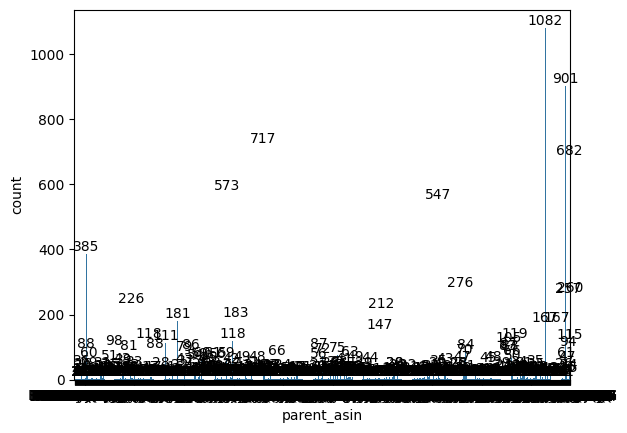

In [21]:
ax=sns.countplot(x='parent_asin', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [23]:
df.groupby(['parent_asin'], as_index=False)['user_id'].sum().sort_values(by='user_id',ascending=False)

,parent_asin,user_id
407,B00OPH6TNQ,AHZWL4Q6JYXPHOEFRGC3QIUDINLQ
283,B00C7INGYK,AHZTB3N2BUTFZMPWAVFQ2L3NF7TA
4,B00014DY62,AHZSW5KOLYC4RD2N5BMNT2RTZNMQAFNIV34LQAGE52FIFT...
1018,B074V2WH3V,AHZSHLGTQZWSFOI5EJUSDWTHITPQ
1138,B079YGRV9H,AHZIZA26SFHN3MD3NOX6F53ZHZ7Q
...,...,...
769,B01KYKCT5E,AE2HEGA22OHIZLCJHEKJEWOGWFFQAEG7F3HVHTVQACOMCJ...
1377,B07QS4TPMW,AE2BSX5LE2J5ZCXS42FPB2TLGSXQAHSF7LMAUYE56OOUVU...
525,B014TEH564,AE2BFEYWR23SOXOXNQUYSJGLVFGQAHPA2VMHFE7WC6REOP...
681,B01I417SO2,AE2ASY7TEBA7VO3OHDIMQAUVT2IA


In [22]:
df.columns

Index(['rating', 'title', 'text', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase', 'date', 'time'],
      dtype='object')

In [24]:
df.groupby(['asin'], as_index=False)['user_id'].sum().sort_values(by='user_id',ascending=False)

,asin,user_id
440,B00OPH6TNQ,AHZWL4Q6JYXPHOEFRGC3QIUDINLQ
311,B00C7INGYK,AHZTB3N2BUTFZMPWAVFQ2L3NF7TA
4,B00014DY62,AHZSW5KOLYC4RD2N5BMNT2RTZNMQAFNIV34LQAGE52FIFT...
1068,B074V2WH3V,AHZSHLGTQZWSFOI5EJUSDWTHITPQ
328,B00E4MHVU2,AHZLZCBXJQGYBO7MNUFOYGZDTOIA
...,...,...
818,B01KYKCT5E,AE2HEGA22OHIZLCJHEKJEWOGWFFQAEG7F3HVHTVQACOMCJ...
1443,B07QS4TPMW,AE2BSX5LE2J5ZCXS42FPB2TLGSXQAHSF7LMAUYE56OOUVU...
563,B014TEH564,AE2BFEYWR23SOXOXNQUYSJGLVFGQAHPA2VMHFE7WC6REOP...
727,B01I417SO2,AE2ASY7TEBA7VO3OHDIMQAUVT2IA


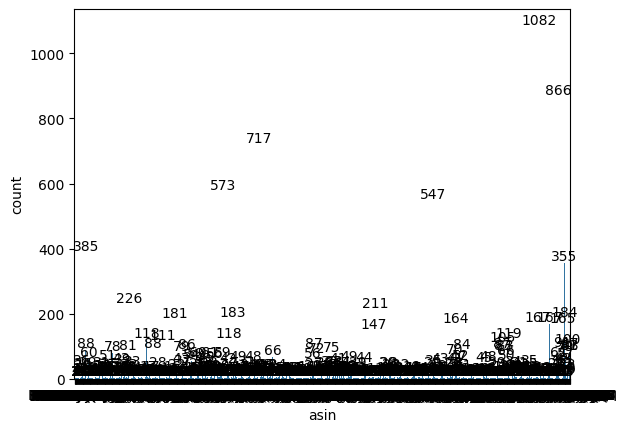

In [25]:
ax=sns.countplot(x='asin',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [26]:
df.columns

Index(['rating', 'title', 'text', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase', 'date', 'time'],
      dtype='object')

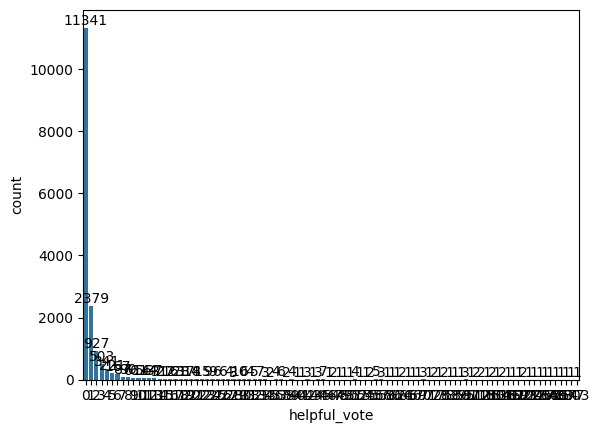

In [8]:
ax=sns.countplot(x='helpful_vote', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [11]:
df.groupby(['helpful_vote'], as_index=False)['user_id'].sum().sort_values(by='user_id', ascending=False)

,helpful_vote,user_id
47,47,AHXTCWBWYRN7O77VLXPVK65HKWTQAHJ6GP43D3I4BVJDKV...
34,34,AHXO5VLK65SGRXIUQHWIRE74P7BAAHQOPVQSN7ZXYTUNWP...
78,134,AHVJRSNSY3ZEPHZ2TOCDEPAWBEYQ
66,72,AHQZPU3KHVRN3NLZFEJYYT3QTXEQAENHA7P2QFZV5AVTGP...
69,83,AHONNWUF3RAQTIWE5554KO6XNZQA
...,...,...
11,11,AEAPPKZXNMS2RJGYQ7B24YSKW4PAAF35JH4373TM7GQRJB...
64,70,AE6M4RIUIVSLFUMSZ3I6IX23T2QAAGPRPCCLHLP6M32J7P...
90,483,AE5YPKTGNY6C6OYU35QOVIMOHMLA
86,246,AE3GS3STRQHBZZFNJI4ZBQTRFPOA


In [12]:
df.groupby(['title'], as_index=False)['user_id'].sum().sort_values(by='user_id',ascending=False)

,title,user_id
9407,Vitamin B complex is a very important part of ...,AHZZJQYNVZUJNPNQ737ITGEQUB4A
10149,buring in my eyes and face,AHZZ3OXGITJ7DEORAZDDUCOSHP4A
423,Always looking for good brain supplements,AHZYYKIMBFCUASJX5QLJDRX36NEA
9534,We went around the world taking their suppleme...,AHZYXESPV7CW3O6NSCFQW5PJKEHQ
738,Bathroom need to have.,AHZYTGDSMINB2SHIDTW5Z3OEGTAA
...,...,...
4216,Highly disappointed!,AE23LU6FD4Q7TJN6VDIX4E4ZOKRA
9805,"Works great, will be ordering much more in the...",AE22EF57IWBRYFUCRPUY7NUT2H5Q
7780,Sleek scale easy to read.,AE227JDSITNZTCFXJ4I5EOSTSPIA
98,2 yrs of using this,AE226SF3TKR7HA22DHEPFTEG222A


In [14]:
df.groupby(['verified_purchase'], as_index=False)['user_id'].sum().sort_values(by='user_id', ascending=False)

,verified_purchase,user_id
0,True,AGDVFFLJWAQ3ULNNKF4LXID2RVSQAG3BSKXHDGP6E3EGQD...
